### ------------------------------------ Developing a model on own data set --------------------------------------- ###

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/Srinivasa Rao/OneDrive/Documents/GUVI Files/Datasets/Car Fuel and Emissions 2000-2013.csv')
df

C:\Users\Srinivasa Rao\AppData\Local\Temp\ipykernel_32772\2981170000.py:1: DtypeWarning: Columns (6,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Srinivasa Rao/OneDrive/Documents/GUVI Files/Datasets/Car Fuel and Emissions 2000-2013.csv')


,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45506,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,2.0 TDI 184PS 5 door DSG,6,D,D6,NaN,1968.0,...,74.0,108.0,0.0,1316.0,NaN,NaN,NaN,NaN,NaN,NaN
45507,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door,6,E,M6,NaN,1984.0,...,38.0,35.0,NaN,1598.0,NaN,NaN,NaN,NaN,NaN,NaN
45508,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 230PS 3 / 5 door,6,E,M6,NaN,1984.0,...,38.0,35.0,NaN,1598.0,NaN,NaN,NaN,NaN,NaN,NaN
45509,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door DSG,6,F,D6,NaN,1984.0,...,54.0,32.0,NaN,1707.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop('file',axis=1)

In [5]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2,weights='distance')
nox_emissions_2d = df['nox_emissions'].values.reshape(-1, 1)
nox_emissions_imputed = imputer.fit_transform(nox_emissions_2d)

In [6]:
df['nox_emissions'] = nox_emissions_imputed.flatten()
df

,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,fuel_type,...,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,Petrol,...,127.164387,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,Petrol,...,127.164387,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,Petrol,...,127.164387,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,Petrol,...,127.164387,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,Petrol,...,127.164387,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45506,2013,Volkswagen,New Golf 2013,2.0 TDI 184PS 5 door DSG,6,D,D6,NaN,1968.0,Diesel,...,74.000000,108.0,0.0,1316.0,NaN,NaN,NaN,NaN,NaN,NaN
45507,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door,6,E,M6,NaN,1984.0,Petrol,...,38.000000,35.0,NaN,1598.0,NaN,NaN,NaN,NaN,NaN,NaN
45508,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 230PS 3 / 5 door,6,E,M6,NaN,1984.0,Petrol,...,38.000000,35.0,NaN,1598.0,NaN,NaN,NaN,NaN,NaN,NaN
45509,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door DSG,6,F,D6,NaN,1984.0,Petrol,...,54.000000,32.0,NaN,1707.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
thc_nox_emissions_2d = df['thc_nox_emissions'].values.reshape(-1, 1)
thc_nox_emissions_2d_imputed = imputer.fit_transform(thc_nox_emissions_2d)

In [8]:
df['thc_nox_emissions'] = thc_nox_emissions_2d_imputed.flatten()
df

,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,fuel_type,...,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,Petrol,...,127.164387,171.675235,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,Petrol,...,127.164387,171.675235,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,Petrol,...,127.164387,171.675235,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,Petrol,...,127.164387,171.675235,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,Petrol,...,127.164387,171.675235,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45506,2013,Volkswagen,New Golf 2013,2.0 TDI 184PS 5 door DSG,6,D,D6,NaN,1968.0,Diesel,...,74.000000,108.000000,0.0,1316.0,NaN,NaN,NaN,NaN,NaN,NaN
45507,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door,6,E,M6,NaN,1984.0,Petrol,...,38.000000,35.000000,NaN,1598.0,NaN,NaN,NaN,NaN,NaN,NaN
45508,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 230PS 3 / 5 door,6,E,M6,NaN,1984.0,Petrol,...,38.000000,35.000000,NaN,1598.0,NaN,NaN,NaN,NaN,NaN,NaN
45509,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door DSG,6,F,D6,NaN,1984.0,Petrol,...,54.000000,32.000000,NaN,1707.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dfengine = df[['engine_capacity', 'co_emissions']]

dfengine = dfengine.dropna()
dfengine

,engine_capacity,co_emissions
0,1598.0,980.0
1,1747.0,1105.0
2,1970.0,1103.0
3,1598.0,980.0
4,1747.0,1105.0
...,...,...
45506,1968.0,165.0
45507,1984.0,409.0
45508,1984.0,409.0
45509,1984.0,357.0


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

X_pre = dfengine['engine_capacity'].values.reshape(-1,1)
y_pre = dfengine['co_emissions'].values.reshape(-1,1)

#X = X_pre
#y = y_pre

# Linearly transformed data

X_pro1 = X_pre.min()
X_pro2 = X_pre.max()
X_norm = (X_pre - X_pro1)/(X_pro2 - X_pro1)
y_max = y_pre.max()
y_min = y_pre.min()
y_norm = (y_pre - y_min)/(y_max - y_min)

In [11]:
X = X_norm
y = 27*X + y_norm

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.50, random_state=27)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [13]:
Residuals = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'R2_Score: {r2}')
print(f'Residuals: {Residuals}')

R2_Score: 0.9999846481932911
Residuals: 0.00013428845693265319


In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

X_pre = dfengine['engine_capacity'].values.reshape(-1,1)
y_pre = dfengine['co_emissions'].values.reshape(-1,1)

#X = X_pre
#y = y_pre

X = X_norm
y = 27*X + y_norm

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=27)
model = SVR(kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
Residuals = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'R2_Score: {r2}')
print(f'Residuals: {Residuals}')

R2_Score: 0.9996066702807438
Residuals: 0.0034480201258785008


In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

X_pre = dfengine['engine_capacity'].values.reshape(-1,1)
y_pre = dfengine['co_emissions'].values.reshape(-1,1)

X = X_norm
y = 27*X + y_norm

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=27)
model = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,max_depth=27,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [22]:
Residuals = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'R2_Score: {r2}')
print(f'Residuals: {Residuals}')

R2_Score: 0.9999753992508026
Residuals: 0.00021565590951219321


In [23]:
from sklearn.neural_network import MLPRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Create an MLP Classifier
mlp = MLPRegressor(activation='logistic',learning_rate='adaptive',hidden_layer_sizes=(64,32,16,), max_iter=500, alpha=1e-4,
                    solver='adam', verbose=10, random_state=1,
                    learning_rate_init=.01) # alpha is a regularization parameter used to control L2 regularization term

# Train the classifier
mlp.fit(X_train, y_train)

# Predictions on the test set
y_pred = mlp.predict(X_test)

r2 = r2_score(y_test,y_pred)
print(r2)

c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5.56104107
Iteration 2, loss = 4.43620551
Iteration 3, loss = 4.43692412
Iteration 4, loss = 4.43629960
Iteration 5, loss = 4.44031154
Iteration 6, loss = 4.43785596
Iteration 7, loss = 4.43808834
Iteration 8, loss = 3.12472205
Iteration 9, loss = 0.14151874
Iteration 10, loss = 0.02896633
Iteration 11, loss = 0.01339469
Iteration 12, loss = 0.00875979
Iteration 13, loss = 0.00676052
Iteration 14, loss = 0.00566230
Iteration 15, loss = 0.00498043
Iteration 16, loss = 0.00398814
Iteration 17, loss = 0.00376624
Iteration 18, loss = 0.00367880
Iteration 19, loss = 0.00306601
Iteration 20, loss = 0.00311275
Iteration 21, loss = 0.00260044
Iteration 22, loss = 0.00274464
Iteration 23, loss = 0.00238448
Iteration 24, loss = 0.00245142
Iteration 25, loss = 0.00213095
Iteration 26, loss = 0.00263326
Iteration 27, loss = 0.00176139
Iteration 28, loss = 0.00206641
Iteration 29, loss = 0.00181289
Iteration 30, loss = 0.00217967
Iteration 31, loss = 0.00237428
Iteration 32, los

In [21]:
dfengine

,engine_capacity,co_emissions
0,1598.0,980.0
1,1747.0,1105.0
2,1970.0,1103.0
3,1598.0,980.0
4,1747.0,1105.0
...,...,...
45506,1968.0,165.0
45507,1984.0,409.0
45508,1984.0,409.0
45509,1984.0,357.0


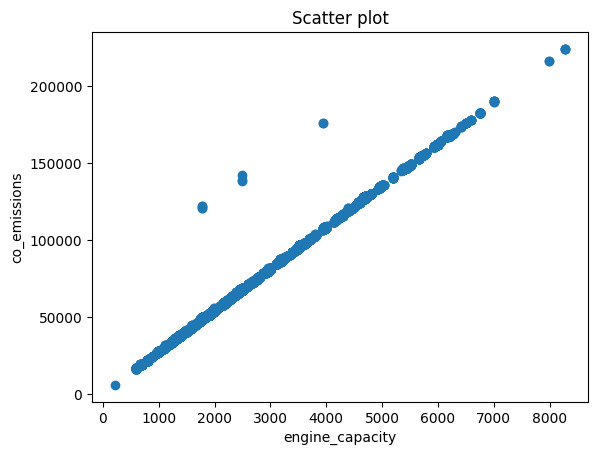

In [22]:
#unnormalized data
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

X = X_pre
y = 27*X + y_pre

plt.scatter(X,y)

# Plot the heatmap
plt.title('Scatter plot')
plt.xlabel('engine_capacity')
plt.ylabel('co_emissions')
plt.show()


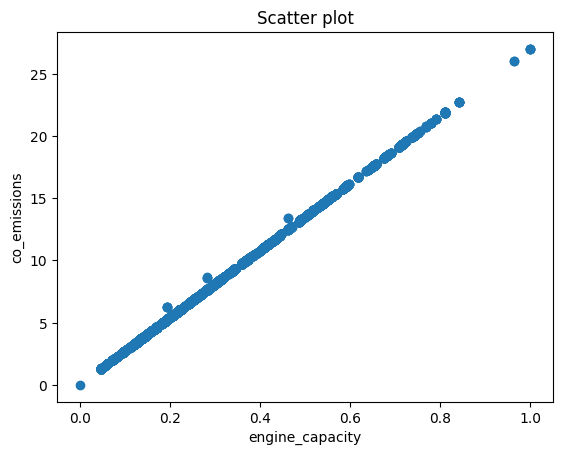

In [23]:
#normalized data
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

X = X_norm
y = 27*X + y_norm

plt.scatter(X,y)

# Plot the heatmap
plt.title('Scatter plot')
plt.xlabel('engine_capacity')
plt.ylabel('co_emissions')
plt.show()